In [1]:
dataset = "purchase100"
algorithm = "bcp"

### 1. Load Dataset

In [2]:
import numpy as np 
from art.utils import to_categorical

x = []
y = []

with open("data/dataset_purchase", "r") as f:
    for datapoint in f.readlines(): 
        split = datapoint.rstrip().split(",")
        label = int(split[0]) - 1
        x.append([int(s) for s in split[1:]])
        y.append(label)

x = np.array(x).astype(np.float32)
y = to_categorical(np.array(y), 100)

target_train_size = 10000
target_test_size = 10000
x_target_train = x[:target_train_size]
y_target_train = y[:target_train_size]
x_target_test = x[target_train_size:target_train_size+target_test_size]
y_target_test = y[target_train_size:target_train_size+target_test_size]

### 2. Define Target Model

In [3]:
from torch import nn
from torchsummary import summary
import math

def purchase_model(): 
    model = nn.Sequential(            
        nn.Linear(600, 128),
        nn.ReLU(),
        nn.Linear(128, 100)
    )
    return model

summary(purchase_model(), input_size=x_target_train[0].shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]          76,928
              ReLU-2                  [-1, 128]               0
            Linear-3                  [-1, 100]          12,900
Total params: 89,828
Trainable params: 89,828
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.34
Estimated Total Size (MB): 0.35
----------------------------------------------------------------


### 3. Train Target Model

In [4]:
! cd bcp && python train_purchase.py --data p100 --prefix p100 --model purchase_model --epoch 100 --batch_size 64 --rampup 10

2022-04-11 05:55:23.194316
Namespace(alpha=0.03529411764705882, augmentation=True, batch_size=64, bce=False, cuda_ids=None, data='p100', drop_last=False, epochs=100, epsilon=0.1411764705882353, epsilon_infty=0.03137254901960784, epsilon_pgd=0.1411764705882353, epsilon_train=0.1411764705882353, epsilon_train_infty=0.03137254901960784, gamma=0.5, kappa=0.0, kappa_schedule_length=10, linfty=False, lr=0.001, lr_scheduler='step', method='BCP', model='purchase_model', model_factor=8, momentum=0.9, niter=100, no_augmentation=False, no_save=False, no_shuffle=False, normalization=False, opt='adam', opt_iter=1, pgd=False, prefix='models/p100/p100_purchase_model_BCP_data_p100_epochs_100_epsilon_train_0.1411764705882353_lr_0.001_opt_adam_opt_iter_1_rampup_10_sniter_1_starting_kappa_1.0_train_method_BCP_warmup_10', print=False, rampup=10, real_time=False, resnet_N=1, resnet_factor=1, save=True, schedule_length=10, seed=2019, shuffle=True, sniter=1, starting_epsilon=0.0, starting_kappa=1.0, step_siz

Test: [16/16]	Time 2.014 (6.089)	L 2.2087 (2.2105)//RL 2.322 (2.323)//RL1 2.329 (2.330)	E 0.600 (0.605)//RE 0.675 (0.653)//RE1 0.675 (0.660)

 * Robust error 0.653	Error 0.605
12 th epoch: epsilon: 0.0313725 - 0.0470588, kappa: 0.7778 - 0.6667, lr: 0.0010000
Epoch: [12][1/16]	Time 6.033 (6.033)	Eps 0.031	Data 1.826 (1.826)	L 0.7740 (0.7740)//RL 0.8401 (0.8401)//RL1 0.8447 (0.8447)	E 0.062 (0.062)//RE 0.062 (0.062)//RE1 0.062 (0.062)
Epoch: [12][16/16]	Time 1.775 (3.904)	Eps 0.045	Data 0.008 (0.123)	L 0.6444 (0.7890)//RL 0.7370 (0.8738)//RL1 0.7431 (0.8794)	E 0.025 (0.025)//RE 0.025 (0.033)//RE1 0.025 (0.033)

Taken 62.80304574966431 s/epoch
Test: [1/16]	Time 8.168 (8.168)	L 2.0574 (2.0574)//RL 2.236 (2.236)//RL1 2.246 (2.246)	E 0.531 (0.531)//RE 0.656 (0.656)//RE1 0.656 (0.656)
Test: [16/16]	Time 2.506 (7.094)	L 2.2064 (2.1056)//RL 2.390 (2.283)//RL1 2.400 (2.294)	E 0.650 (0.564)//RE 0.750 (0.651)//RE1 0.775 (0.658)

 * Robust error 0.651	Error 0.564
13 th epoch: epsilon: 0.0470588 - 0

Epoch: [22][1/16]	Time 7.430 (7.430)	Eps 0.141	Data 1.705 (1.705)	L 0.1186 (0.1186)//RL 0.2413 (0.2413)//RL1 0.2478 (0.2478)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)
Epoch: [22][16/16]	Time 1.826 (4.962)	Eps 0.154	Data 0.008 (0.115)	L 0.1271 (0.1175)//RL 0.2702 (0.2468)//RL1 0.2785 (0.2543)	E 0.000 (0.000)//RE 0.000 (0.001)//RE1 0.000 (0.001)

Taken 79.74888896942139 s/epoch
Test: [1/16]	Time 7.927 (7.927)	L 1.7058 (1.7058)//RL 2.352 (2.352)//RL1 2.378 (2.378)	E 0.453 (0.453)//RE 0.719 (0.719)//RE1 0.719 (0.719)
Test: [16/16]	Time 2.311 (6.422)	L 1.6979 (1.7222)//RL 2.349 (2.370)//RL1 2.374 (2.397)	E 0.525 (0.528)//RE 0.725 (0.725)//RE1 0.725 (0.738)

 * Robust error 0.725	Error 0.528
LR DECAY STEP
Best Error Found! 0.725
23 th epoch: epsilon: 0.1411765 - 0.1411765, kappa: 0.0000 - 0.0000, lr: 0.0010000
Epoch: [23][1/16]	Time 7.100 (7.100)	Eps 0.141	Data 1.700 (1.700)	L 0.0975 (0.0975)//RL 0.2044 (0.2044)//RL1 0.2108 (0.2108)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.

Epoch: [32][16/16]	Time 1.810 (4.659)	Eps 0.154	Data 0.009 (0.116)	L 0.0370 (0.0368)//RL 0.0946 (0.0907)//RL1 0.0974 (0.0937)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)

Taken 74.93909883499146 s/epoch
Test: [1/16]	Time 8.857 (8.857)	L 1.6816 (1.6816)//RL 2.367 (2.367)//RL1 2.391 (2.391)	E 0.484 (0.484)//RE 0.734 (0.734)//RE1 0.734 (0.734)
Test: [16/16]	Time 1.670 (6.034)	L 1.6326 (1.6837)//RL 2.316 (2.370)//RL1 2.340 (2.395)	E 0.575 (0.532)//RE 0.725 (0.719)//RE1 0.725 (0.729)

 * Robust error 0.719	Error 0.532
LR DECAY STEP
Best Error Found! 0.719
33 th epoch: epsilon: 0.1411765 - 0.1411765, kappa: 0.0000 - 0.0000, lr: 0.0005000
Epoch: [33][1/16]	Time 6.961 (6.961)	Eps 0.141	Data 1.684 (1.684)	L 0.0346 (0.0346)//RL 0.0823 (0.0823)//RL1 0.0848 (0.0848)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)
Epoch: [33][16/16]	Time 2.268 (5.173)	Eps 0.154	Data 0.007 (0.113)	L 0.0357 (0.0348)//RL 0.0910 (0.0862)//RL1 0.0941 (0.0890)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0


Taken 85.28085494041443 s/epoch
Test: [1/16]	Time 9.478 (9.478)	L 1.6858 (1.6858)//RL 2.391 (2.391)//RL1 2.415 (2.415)	E 0.500 (0.500)//RE 0.734 (0.734)//RE1 0.734 (0.734)
Test: [16/16]	Time 2.406 (6.751)	L 1.6151 (1.6873)//RL 2.315 (2.394)//RL1 2.339 (2.419)	E 0.525 (0.535)//RE 0.725 (0.722)//RE1 0.725 (0.729)

 * Robust error 0.722	Error 0.535
LR DECAY STEP
43 th epoch: epsilon: 0.1411765 - 0.1411765, kappa: 0.0000 - 0.0000, lr: 0.0002500
Epoch: [43][1/16]	Time 6.477 (6.477)	Eps 0.141	Data 1.657 (1.657)	L 0.0255 (0.0255)//RL 0.0626 (0.0626)//RL1 0.0647 (0.0647)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)
Epoch: [43][16/16]	Time 1.927 (4.962)	Eps 0.154	Data 0.007 (0.127)	L 0.0238 (0.0240)//RL 0.0656 (0.0621)//RL1 0.0677 (0.0641)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)

Taken 79.79957103729248 s/epoch
Test: [1/16]	Time 9.472 (9.472)	L 1.6950 (1.6950)//RL 2.402 (2.402)//RL1 2.426 (2.426)	E 0.484 (0.484)//RE 0.734 (0.734)//RE1 0.734 (0.734)
Test: [16/16]	Time 1.621

Test: [16/16]	Time 2.774 (7.200)	L 1.6201 (1.6891)//RL 2.329 (2.404)//RL1 2.352 (2.429)	E 0.525 (0.538)//RE 0.725 (0.723)//RE1 0.725 (0.730)

 * Robust error 0.723	Error 0.538
LR DECAY STEP
53 th epoch: epsilon: 0.1411765 - 0.1411765, kappa: 0.0000 - 0.0000, lr: 0.0001250
Epoch: [53][1/16]	Time 7.245 (7.245)	Eps 0.141	Data 1.640 (1.640)	L 0.0190 (0.0190)//RL 0.0479 (0.0479)//RL1 0.0493 (0.0493)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)
Epoch: [53][16/16]	Time 2.277 (4.828)	Eps 0.154	Data 0.007 (0.112)	L 0.0206 (0.0201)//RL 0.0562 (0.0531)//RL1 0.0583 (0.0549)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)

Taken 77.60930895805359 s/epoch
Test: [1/16]	Time 10.186 (10.186)	L 1.6959 (1.6959)//RL 2.411 (2.411)//RL1 2.435 (2.435)	E 0.500 (0.500)//RE 0.734 (0.734)//RE1 0.734 (0.734)
Test: [16/16]	Time 2.243 (7.087)	L 1.6185 (1.6891)//RL 2.327 (2.405)//RL1 2.350 (2.430)	E 0.550 (0.536)//RE 0.725 (0.719)//RE1 0.725 (0.728)

 * Robust error 0.719	Error 0.536
LR DECAY STEP
54 th

Epoch: [63][1/16]	Time 7.503 (7.503)	Eps 0.141	Data 1.714 (1.714)	L 0.0175 (0.0175)//RL 0.0451 (0.0451)//RL1 0.0465 (0.0465)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)
Epoch: [63][16/16]	Time 1.914 (5.250)	Eps 0.154	Data 0.007 (0.118)	L 0.0197 (0.0184)//RL 0.0551 (0.0491)//RL1 0.0571 (0.0507)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)

Taken 84.38170218467712 s/epoch
Test: [1/16]	Time 10.053 (10.053)	L 1.6999 (1.6999)//RL 2.421 (2.421)//RL1 2.445 (2.445)	E 0.531 (0.531)//RE 0.734 (0.734)//RE1 0.734 (0.734)
Test: [16/16]	Time 2.945 (6.751)	L 1.6180 (1.6911)//RL 2.332 (2.412)//RL1 2.355 (2.437)	E 0.550 (0.545)//RE 0.725 (0.719)//RE1 0.725 (0.728)

 * Robust error 0.719	Error 0.545
LR DECAY STEP
64 th epoch: epsilon: 0.1411765 - 0.1411765, kappa: 0.0000 - 0.0000, lr: 0.0000625
Epoch: [64][1/16]	Time 7.273 (7.273)	Eps 0.141	Data 1.670 (1.670)	L 0.0176 (0.0176)//RL 0.0451 (0.0451)//RL1 0.0465 (0.0465)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)
Epoch: [64][16/16

Epoch: [73][16/16]	Time 2.588 (5.660)	Eps 0.154	Data 0.008 (0.114)	L 0.0162 (0.0175)//RL 0.0457 (0.0470)//RL1 0.0470 (0.0486)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)

Taken 90.92589092254639 s/epoch
Test: [1/16]	Time 10.012 (10.012)	L 1.7041 (1.7041)//RL 2.427 (2.427)//RL1 2.452 (2.452)	E 0.516 (0.516)//RE 0.734 (0.734)//RE1 0.734 (0.734)
Test: [16/16]	Time 1.704 (6.267)	L 1.6195 (1.6924)//RL 2.336 (2.416)//RL1 2.359 (2.440)	E 0.525 (0.543)//RE 0.725 (0.719)//RE1 0.725 (0.729)

 * Robust error 0.719	Error 0.543
LR DECAY STEP
74 th epoch: epsilon: 0.1411765 - 0.1411765, kappa: 0.0000 - 0.0000, lr: 0.0000313
Epoch: [74][1/16]	Time 6.827 (6.827)	Eps 0.141	Data 1.648 (1.648)	L 0.0176 (0.0176)//RL 0.0455 (0.0455)//RL1 0.0471 (0.0471)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)
Epoch: [74][16/16]	Time 3.091 (5.497)	Eps 0.154	Data 0.018 (0.111)	L 0.0172 (0.0175)//RL 0.0482 (0.0468)//RL1 0.0500 (0.0484)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)

Taken 88.305581


Taken 83.66125178337097 s/epoch
Test: [1/16]	Time 9.609 (9.609)	L 1.7066 (1.7066)//RL 2.431 (2.431)//RL1 2.455 (2.455)	E 0.516 (0.516)//RE 0.734 (0.734)//RE1 0.734 (0.734)
Test: [16/16]	Time 2.566 (7.282)	L 1.6173 (1.6934)//RL 2.334 (2.418)//RL1 2.358 (2.443)	E 0.525 (0.542)//RE 0.725 (0.719)//RE1 0.725 (0.728)

 * Robust error 0.719	Error 0.542
LR DECAY STEP
84 th epoch: epsilon: 0.1411765 - 0.1411765, kappa: 0.0000 - 0.0000, lr: 0.0000156
Epoch: [84][1/16]	Time 8.329 (8.329)	Eps 0.141	Data 1.736 (1.736)	L 0.0175 (0.0175)//RL 0.0452 (0.0452)//RL1 0.0464 (0.0464)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)
Epoch: [84][16/16]	Time 1.841 (4.955)	Eps 0.154	Data 0.007 (0.118)	L 0.0152 (0.0171)//RL 0.0429 (0.0458)//RL1 0.0442 (0.0474)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)

Taken 79.6460371017456 s/epoch
Test: [1/16]	Time 9.527 (9.527)	L 1.7064 (1.7064)//RL 2.431 (2.431)//RL1 2.455 (2.455)	E 0.516 (0.516)//RE 0.734 (0.734)//RE1 0.734 (0.734)
Test: [16/16]	Time 1.594 

Test: [16/16]	Time 2.707 (6.914)	L 1.6174 (1.6934)//RL 2.335 (2.419)//RL1 2.358 (2.444)	E 0.550 (0.544)//RE 0.725 (0.719)//RE1 0.725 (0.729)

 * Robust error 0.719	Error 0.544
LR DECAY STEP
94 th epoch: epsilon: 0.1411765 - 0.1411765, kappa: 0.0000 - 0.0000, lr: 0.0000078
Epoch: [94][1/16]	Time 7.711 (7.711)	Eps 0.141	Data 1.639 (1.639)	L 0.0164 (0.0164)//RL 0.0420 (0.0420)//RL1 0.0433 (0.0433)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)
Epoch: [94][16/16]	Time 2.132 (4.970)	Eps 0.154	Data 0.008 (0.113)	L 0.0179 (0.0168)//RL 0.0497 (0.0453)//RL1 0.0518 (0.0468)	E 0.000 (0.000)//RE 0.000 (0.000)//RE1 0.000 (0.000)

Taken 79.90167188644409 s/epoch
Test: [1/16]	Time 10.173 (10.173)	L 1.7065 (1.7065)//RL 2.432 (2.432)//RL1 2.456 (2.456)	E 0.516 (0.516)//RE 0.734 (0.734)//RE1 0.734 (0.734)
Test: [16/16]	Time 2.731 (7.540)	L 1.6174 (1.6934)//RL 2.335 (2.419)//RL1 2.358 (2.444)	E 0.550 (0.543)//RE 0.725 (0.719)//RE1 0.725 (0.729)

 * Robust error 0.719	Error 0.543
LR DECAY STEP
95 th

In [10]:
import torch
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset

def get_acc(model, x, y):
    _, predictions = torch.max(model(torch.from_numpy(x)), 1)
    acc = np.mean(predictions.detach().numpy() == np.argmax(y, axis=1))
    return acc

model = purchase_model()
model.load_state_dict(torch.load("models/purchase100_bcp.pth", map_location=torch.device('cpu'))['state_dict'][0])
model.eval()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

print("Train accuracy:", get_acc(model, x_target_train, y_target_train))
print("Test accuracy:", get_acc(model, x_target_test, y_target_test))

Train accuracy: 0.508
Test accuracy: 0.4548


### 4. Generate Adversarial Examples using HopSkipJump

In [11]:
from art.attacks.evasion import HopSkipJump
from art.estimators.classification.pytorch import PyTorchClassifier
from numpy.random import choice

art_classifier=PyTorchClassifier(
    model=model,
    loss=loss_fn,
    optimizer=optimizer,
    input_shape=x_target_train[0].shape,
    nb_classes=100,
)
attack = HopSkipJump(classifier=art_classifier, norm=2, targeted=False)

train_idx = choice(len(x_target_train), 100)
y_adv_train = y_target_train[train_idx]
x_adv_train = attack.generate(x=x_target_train[train_idx], y=y_adv_train)

test_idx = choice(len(x_target_test), 100)
y_adv_test = y_target_test[test_idx]
x_adv_test = attack.generate(x=x_target_test[test_idx], y=y_adv_test)

HopSkipJump:   0%|          | 0/100 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/100 [00:00<?, ?it/s]

### 5. Measure the Distribution of Distance to Decision Boundary

                0
count  100.000000
mean     0.569230
std      0.692374
min      0.000000
25%      0.114246
50%      0.277720
75%      0.720503
max      3.341651
                0
count  100.000000
mean     0.501779
std      0.569823
min      0.000000
25%      0.147356
50%      0.288740
75%      0.719038
max      3.429769


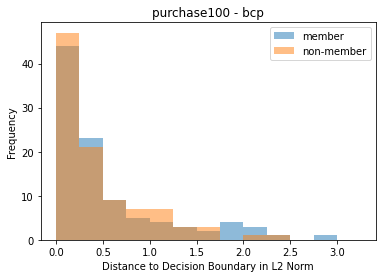

In [12]:
from matplotlib import pyplot as plt
import pandas as pd

def dist(x, x_adv):
    return np.linalg.norm(np.reshape(x_adv - x, [-1]))

dist_train = [dist(x, xa) for (x, xa) in zip(x_target_train[train_idx], x_adv_train)]
dist_test = [dist(x, xa) for (x, xa) in zip(x_target_test[test_idx], x_adv_test)]
print(pd.DataFrame(np.array(dist_train)).describe())
print(pd.DataFrame(np.array(dist_test)).describe())

bins = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25]

plt.hist(dist_train, bins, alpha=0.5, label='member')
plt.hist(dist_test, bins, alpha=0.5, label='non-member')
plt.legend(loc='upper right')
plt.title(f'{dataset} - {algorithm}')
plt.xlabel("Distance to Decision Boundary in L2 Norm")
plt.ylabel("Frequency")
plt.show()

### 6. Measure the Advantage of An Adversary in Label-Only Membership Inference Attacks

[0.   0.01 0.01 0.02 0.02 0.03 0.03 0.04 0.04 0.06 0.06 0.07 0.07 0.08
 0.08 0.1  0.1  0.11 0.11 0.13 0.13 0.17 0.17 0.18 0.18 0.22 0.22 0.23
 0.23 0.26 0.26 0.27 0.27 0.31 0.31 0.32 0.32 0.34 0.34 0.35 0.35 0.36
 0.36 0.38 0.38 0.41 0.41 0.42 0.42 0.43 0.43 0.44 0.44 0.47 0.47 0.48
 0.48 0.51 0.51 0.52 0.52 0.53 0.53 0.55 0.55 0.58 0.58 0.61 0.61 0.66
 0.66 0.7  0.7  0.72 0.72 0.73 0.73 0.77 0.77 0.78 0.78 0.79 0.79 0.8
 0.8  0.82 0.82 0.84 0.84 0.86 0.86 0.87 0.87 0.89 0.89 0.93 0.93 0.95
 0.95 0.98 0.98 0.99 1.  ]
[0.   0.   0.03 0.03 0.06 0.06 0.1  0.1  0.11 0.11 0.13 0.13 0.14 0.14
 0.15 0.15 0.16 0.16 0.17 0.17 0.19 0.19 0.2  0.2  0.22 0.22 0.23 0.23
 0.25 0.25 0.27 0.27 0.28 0.28 0.3  0.3  0.34 0.34 0.35 0.35 0.36 0.36
 0.37 0.37 0.39 0.39 0.4  0.4  0.42 0.42 0.43 0.43 0.45 0.45 0.46 0.46
 0.48 0.48 0.51 0.51 0.53 0.53 0.56 0.56 0.58 0.58 0.6  0.6  0.61 0.61
 0.65 0.65 0.68 0.68 0.69 0.69 0.7  0.7  0.74 0.74 0.76 0.76 0.77 0.77
 0.8  0.8  0.81 0.81 0.83 0.83 0.88 0.88 0.89 0.89 

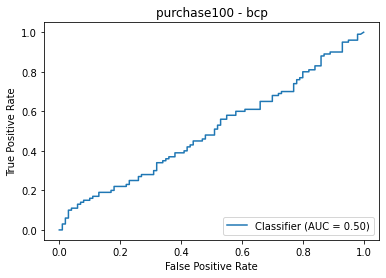

In [13]:
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_curve

fpr, tpr, thresholds = roc_curve(
    np.concatenate((np.ones(len(dist_train)), np.zeros(len(dist_test)))),
    dist_train + dist_test
)
print(fpr)
print(tpr)
print(thresholds)

RocCurveDisplay.from_predictions(
    np.concatenate((np.ones(len(dist_train)), np.zeros(len(dist_test)))),
    dist_train + dist_test
)
plt.title(f'{dataset} - {algorithm}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### 7. Measure the Statistical Relationship between Distance to Decision Boundary and Confidence Scores

In [14]:
from scipy.stats.stats import pearsonr
import scipy

confidence_train = [np.amax(scipy.special.softmax(p)) for p in art_classifier.predict(x_target_train[train_idx])]
confidence_test = [np.amax(scipy.special.softmax(p)) for p in art_classifier.predict(x_target_test[test_idx])]

corr, pvalue = pearsonr(confidence_train, dist_train)
print("train correlation ", corr, pvalue)
corr, pvalue = pearsonr(confidence_test, dist_test)
print("test correlation ", corr, pvalue)

train correlation  0.7820614452295905 7.635585101441989e-22
test correlation  0.7165877913754046 5.165000904771374e-17
